# Instruction Partners Survey Analysis

- How is our team performing? How are our partners feeling about our work? 
- Across the organization, what are our bright spots and our places to improve? Do we have any major outliers?
- What are the significant patterns or trends? How is the data changing over time?

Tableau Public:
https://public.tableau.com/app/profile/christopher.chung6215/viz/InstructionPartnersContentExercise/InstructionPartnersContentExercise?publish=yes

## 1. Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
filepath = "../Data/Partnership Data Lead _ Systems and Data Analyst - Content Exercise Data.xlsx"
survey = pd.read_excel(filepath, sheet_name = 'Survey Data')
org = pd.read_excel(filepath, sheet_name = 'Org Data')

In [3]:
# examine first five rows of survey
survey.head()

,Survey Collection ID,System,School,Survey Type,Delivery Method,Date,Primary Facilitator,Secondary Facilitator,Tertiary Facilitator,Quaternary Facilitator,...,Clear about change we seek,Clear about roles and responsibilities,Confident plan will achieve goals,Feel more equipped,Equipped and supported,Understand state of instruction,Valuable use of my time:,Clarity direction of work ahead,I learned something:,Likely to recommend Instruction Partners
0,a152E00000EpDCyQAN,District/Network 32,School 69,Leader Coaching,Virtual,2021-07-13,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,NaN
1,a152E00000EpDCyQAN,District/Network 32,School 69,Leader Coaching,Virtual,2021-07-13,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Agree,NaN,Strongly Agree,NaN
2,a152E00000EpDCyQAN,District/Network 32,School 72,Leader Coaching,Virtual,2021-07-13,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,NaN,Somewhat Disagree,NaN
3,a152E00000EpDCyQAN,District/Network 32,School 72,Leader Coaching,Virtual,2021-07-13,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat Agree,NaN,Agree,NaN
4,a152E00000EpDCyQAN,District/Network 32,School 73,Leader Coaching,Virtual,2021-07-13,Facilitator 10,Facilitator 33,Facilitator 13,Facilitator 16,...,NaN,NaN,NaN,NaN,NaN,NaN,Agree,NaN,Strongly Agree,NaN


In [4]:
# examine first five rows of org
org.head()

,Faciliator ID,Role Type,Team,Org Group,Active
0,Facilitator 1,Role 3,Team 1,Partnership,Yes
1,Facilitator 10,Role 4,Team 2,Partnership,Yes
2,Facilitator 11,Role 1,Team 3,Partnership,Yes
3,Facilitator 12,Role 4,Team 1,Partnership,Yes
4,Facilitator 13,Role 2,Team 2,Partnership,Yes


## 2. Data Wrangling

In [5]:
# change typo in column name for org
org = org.rename(columns={'Faciliator ID':'Facilitator ID'})

In [6]:
# merge on left: Primary Facilitator, right: Facilitator ID
survey = survey.merge(org, 
                      how = 'left', 
                      left_on = 'Primary Facilitator', 
                      right_on = 'Facilitator ID',
                     )

In [7]:
# examine first five rows of merged dataframe
survey.head().transpose()

,0,1,2,3,4
Survey Collection ID,a152E00000EpDCyQAN,a152E00000EpDCyQAN,a152E00000EpDCyQAN,a152E00000EpDCyQAN,a152E00000EpDCyQAN
System,District/Network 32,District/Network 32,District/Network 32,District/Network 32,District/Network 32
School,School 69,School 69,School 72,School 72,School 73
Survey Type,Leader Coaching,Leader Coaching,Leader Coaching,Leader Coaching,Leader Coaching
Delivery Method,Virtual,Virtual,Virtual,Virtual,Virtual
Date,2021-07-13 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00
Primary Facilitator,Facilitator 10,Facilitator 10,Facilitator 10,Facilitator 10,Facilitator 10
Secondary Facilitator,Facilitator 33,Facilitator 33,Facilitator 33,Facilitator 33,Facilitator 33
Tertiary Facilitator,Facilitator 13,Facilitator 13,Facilitator 13,Facilitator 13,Facilitator 13
Quaternary Facilitator,Facilitator 16,Facilitator 16,Facilitator 16,Facilitator 16,Facilitator 16


In [8]:
# check how many null values
survey.isnull().sum()

Survey Collection ID                           0
System                                         0
School                                       492
Survey Type                                    0
Delivery Method                              104
Date                                           0
Primary Facilitator                            0
Secondary Facilitator                       1917
Tertiary Facilitator                        2706
Quaternary Facilitator                      3321
Submitter Role                                 0
Clear about change we seek                  3227
Clear about roles and responsibilities      3227
Confident plan will achieve goals           3227
Feel more equipped                          1376
Equipped and supported                      3641
Understand state of instruction             3016
Valuable use of my time:                       0
Clarity direction of work ahead             3641
I learned something:                        2175
Likely to recommend 

Many null values, but most likely do to different types of surveys containing different questions.  

We'll assign the responses on the Likert scale to numeric values for our analysis.

In [9]:
#create copy
survey_num = survey.copy()

replacer = {'Strongly Disagree': 1, 
            'Disagree': 2,
            'Somewhat Disagree': 3,
            'Neutral': 4,
            'Somewhat Agree': 5, 
            'Agree': 6,
            'Strongly Agree': 7,
           }

# Select String Columns
cols = survey_num.columns[survey_num.dtypes == 'object']

# Replace Values in those Columns
survey_num[cols] = survey_num[cols].replace(replacer)

In [10]:
survey_num.head().transpose()

,0,1,2,3,4
Survey Collection ID,a152E00000EpDCyQAN,a152E00000EpDCyQAN,a152E00000EpDCyQAN,a152E00000EpDCyQAN,a152E00000EpDCyQAN
System,District/Network 32,District/Network 32,District/Network 32,District/Network 32,District/Network 32
School,School 69,School 69,School 72,School 72,School 73
Survey Type,Leader Coaching,Leader Coaching,Leader Coaching,Leader Coaching,Leader Coaching
Delivery Method,Virtual,Virtual,Virtual,Virtual,Virtual
Date,2021-07-13 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00
Primary Facilitator,Facilitator 10,Facilitator 10,Facilitator 10,Facilitator 10,Facilitator 10
Secondary Facilitator,Facilitator 33,Facilitator 33,Facilitator 33,Facilitator 33,Facilitator 33
Tertiary Facilitator,Facilitator 13,Facilitator 13,Facilitator 13,Facilitator 13,Facilitator 13
Quaternary Facilitator,Facilitator 16,Facilitator 16,Facilitator 16,Facilitator 16,Facilitator 16


## 3. How is our team performing? How are our partners feeling about our work? 

In [11]:
# filter for facilitators who are in Partnership Team
partnership_survey = survey_num[survey_num['Org Group']=='Partnership']

In [12]:
questions = ['Clear about change we seek',
             'Clear about roles and responsibilities',
             'Confident plan will achieve goals',
             'Feel more equipped',
             'Equipped and supported',
             'Understand state of instruction',
             'Valuable use of my time:',
             'Clarity direction of work ahead',
             'I learned something:',
             'Likely to recommend Instruction Partners'
            ]

In [13]:
partnership_survey[questions].describe().transpose().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Likely to recommend Instruction Partners,2696.0,8.698442,1.948296,0.0,8.00,10.0,10.00,10.0
I learned something:,1393.0,6.529074,0.925017,1.0,6.00,7.0,7.00,7.0
Clear about change we seek,389.0,6.516710,0.751530,1.0,6.00,7.0,7.00,7.0
Understand state of instruction,609.0,6.440066,1.035602,1.0,6.00,7.0,7.00,7.0
Valuable use of my time:,3512.0,6.421128,0.997598,1.0,6.00,7.0,7.00,7.0
Confident plan will achieve goals,389.0,6.406170,0.827718,1.0,6.00,7.0,7.00,7.0
Clear about roles and responsibilities,389.0,6.298201,0.957080,1.0,6.00,7.0,7.00,7.0
Feel more equipped,2215.0,6.232054,1.059803,1.0,6.00,6.0,7.00,7.0
Clarity direction of work ahead,8.0,6.125000,0.640870,5.0,6.00,6.0,6.25,7.0
Equipped and supported,8.0,5.750000,0.886405,4.0,5.75,6.0,6.00,7.0


Overall, partnership team is doing very well!  Keep in mind that the responses to the question 'Likely to recommend Instruction Partners' are integer values from 0 to 10 inclusive.

The survey questions and averages that are likely to represent how our partners feel about are work are:
- Likely to recommend Instruction Partners
- I learned something:
- Valuable use of my time:
- Feel more equipped
- Equipped and supported

There is one question that averaged below a 6 on the Likert Scale (out of 7), which is 'Equipped and supported'.  We'll look into this question to see what the responses looked like.

In [14]:
# responses for 'Equipped and supported'
partnership_survey['Equipped and supported'].value_counts()

6.0    5
7.0    1
5.0    1
4.0    1
Name: Equipped and supported, dtype: int64

Only 8 responses for this question.  May not be a strong indicator of anything.

## 4. Across the organization, what are our bright spots and our places to improve? Do we have any major outliers?

### Part 1: Analyze facilitators part of Program team.

In [15]:
# filter for facilitators who are in Program Team
program_survey = survey_num[survey_num['Org Group']=='Program']

In [16]:
program_survey.shape

(81, 26)

In [17]:
program_survey[questions].describe().transpose().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Likely to recommend Instruction Partners,76.0,8.197368,2.239165,1.0,7.0,9.5,10.0,10.0
Understand state of instruction,22.0,6.636364,0.581087,5.0,6.0,7.0,7.0,7.0
I learned something:,55.0,6.527273,0.939948,1.0,6.0,7.0,7.0,7.0
Valuable use of my time:,81.0,6.370370,1.017895,1.0,6.0,7.0,7.0,7.0
Clear about change we seek,3.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
Clear about roles and responsibilities,3.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
Confident plan will achieve goals,3.0,6.000000,1.732051,4.0,5.5,7.0,7.0,7.0
Feel more equipped,40.0,5.725000,1.413987,1.0,5.0,6.0,7.0,7.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Program team also seems to have good responses.  The lowest average Likert score is from 'Feel more equipped', with 40 respondents.  We can look at the visualization of this below.

In [18]:
pr_eq = pd.DataFrame(program_survey['Feel more equipped'].value_counts().reset_index())
pr_eq = pr_eq.rename(columns={'index':'Response', 'Feel more equipped':'Count'})
pr_eq = pr_eq.sort_values(by='Response', ascending=False)
pr_eq

,Response,Count
1,7.0,13
0,6.0,15
2,5.0,6
3,4.0,3
6,3.0,1
4,2.0,1
5,1.0,1


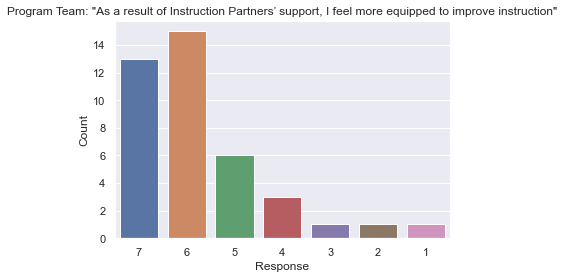

In [19]:
sns.barplot(x='Response', y='Count', data = pr_eq, order = [7,6,5,4,3,2,1])
plt.title('Program Team: "As a result of Instruction Partners’ support, I feel more equipped to improve instruction"')
plt.show()

Within the Program Team, most are happy with Instruction Partners support to improve instruction.  However there are 6 out of 40 respondents who were 'Neutral' or below.

### Part 2: Analyze System

In [20]:
len(survey_num['System'].unique())

73

In [21]:
system_mean = pd.DataFrame(survey_num.groupby('System').mean())
system_mean

,Clear about change we seek,Clear about roles and responsibilities,Confident plan will achieve goals,Feel more equipped,Equipped and supported,Understand state of instruction,Valuable use of my time:,Clarity direction of work ahead,I learned something:,Likely to recommend Instruction Partners
System,,,,,,,,,,
District/Network 1,7.000000,7.000000,6.500000,7.000000,NaN,6.750000,6.923077,NaN,7.000000,10.000000
District/Network 11,6.428571,6.428571,5.571429,6.750000,6.0,6.272727,6.516129,6.5,6.590909,8.857143
District/Network 12,6.500000,6.000000,6.000000,5.944444,NaN,6.625000,6.562500,NaN,6.666667,8.680000
District/Network 13,6.842105,6.157895,6.736842,7.000000,NaN,6.333333,6.666667,NaN,6.500000,9.125000
District/Network 14,7.000000,7.000000,7.000000,5.862069,NaN,7.000000,6.250000,NaN,6.185185,8.952381
...,...,...,...,...,...,...,...,...,...,...
District/Network 73,NaN,NaN,NaN,NaN,NaN,NaN,5.833333,NaN,5.833333,8.333333
District/Network 74,6.500000,6.000000,6.000000,7.000000,NaN,7.000000,6.363636,NaN,6.166667,9.363636
District/Network 75,6.235294,5.882353,6.176471,5.375000,NaN,NaN,6.212121,NaN,5.125000,NaN


Let's first look at the heatmap of "Likely to recommend Instruction Partners" separately, since it's on a different scale than the other questions.

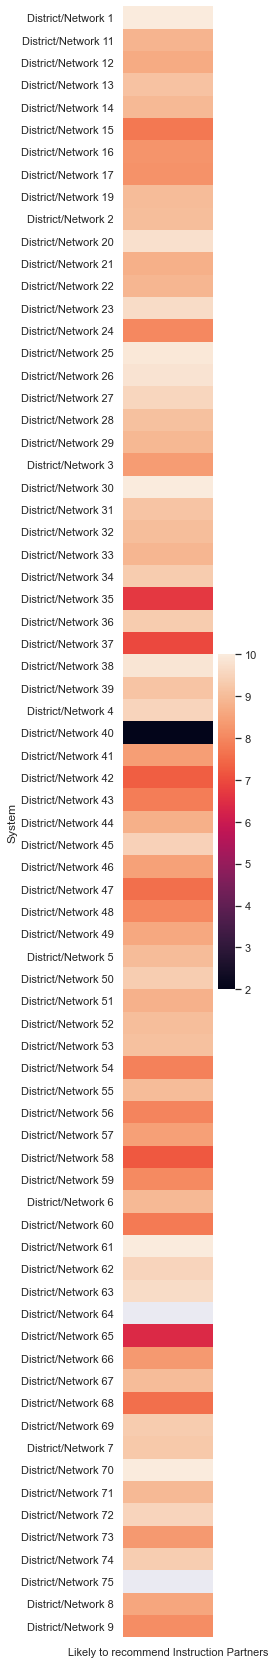

In [22]:
plt.figure(figsize=(2, 30))
sns.heatmap(system_mean[['Likely to recommend Instruction Partners']])
plt.show()

Following school systems have lower average values for "Likely to recommend Instruction Partners":
- District/Network 35
- District/Network 37
- District/Network 40
- District/Network 65

We'll explore the summary statistics of the survey results of each of these districts.

In [23]:
# District/Network 35
survey_num[survey_num['System']=='District/Network 35'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,3.0,6.666667,0.577350,6.0,6.50,7.0,7.0,7.0
Clear about roles and responsibilities,3.0,6.333333,1.154701,5.0,6.00,7.0,7.0,7.0
Confident plan will achieve goals,3.0,6.333333,0.577350,6.0,6.00,6.0,6.5,7.0
Feel more equipped,7.0,5.000000,1.154701,4.0,4.00,5.0,5.5,7.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,6.0,6.500000,0.836660,5.0,6.25,7.0,7.0,7.0
Valuable use of my time:,16.0,5.812500,1.641899,2.0,5.75,6.0,7.0,7.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,7.0,6.571429,0.534522,6.0,6.00,7.0,7.0,7.0
Likely to recommend Instruction Partners,12.0,6.666667,3.700942,0.0,5.00,8.0,10.0,10.0


There are not too many respondents in this district, but the two lowest average scores come from:
- "Feel more equipped"
- "Valuable use of my time:"

In [24]:
# District/Network 37
survey_num[survey_num['System']=='District/Network 37'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,4.0,7.000000,0.000000,7.0,7.00,7.0,7.0,7.0
Clear about roles and responsibilities,4.0,6.750000,0.500000,6.0,6.75,7.0,7.0,7.0
Confident plan will achieve goals,4.0,6.750000,0.500000,6.0,6.75,7.0,7.0,7.0
Feel more equipped,47.0,5.936170,1.465609,1.0,6.00,6.0,7.0,7.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,2.0,7.000000,0.000000,7.0,7.00,7.0,7.0,7.0
Valuable use of my time:,59.0,6.067797,1.375455,1.0,6.00,7.0,7.0,7.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,22.0,6.727273,0.631085,5.0,7.00,7.0,7.0,7.0
Likely to recommend Instruction Partners,44.0,6.954545,2.710484,0.0,5.00,7.0,9.0,10.0


Lowest average score here is from:
- "Feel more equipped"
- "Valuable use of my time"

25% of respondents to "Likely to recommend..." responded with a score of 5 or below.

In [25]:
# District/Network 40
survey_num[survey_num['System']=='District/Network 40'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,1.0,4.0,NaN,4.0,4.00,4.0,4.00,4.0
Clear about roles and responsibilities,1.0,4.0,NaN,4.0,4.00,4.0,4.00,4.0
Confident plan will achieve goals,1.0,4.0,NaN,4.0,4.00,4.0,4.00,4.0
Feel more equipped,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valuable use of my time:,2.0,2.5,2.12132,1.0,1.75,2.5,3.25,4.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Likely to recommend Instruction Partners,1.0,2.0,NaN,2.0,2.00,2.0,2.00,2.0


Very few respondents from District/Network 40 (at most 2 people).  Seems like both are not very pleased with Instruction Partners.

In [26]:
# District/Network 65
survey_num[survey_num['System']=='District/Network 65'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,3.0,6.000000,0.000000,6.0,6.00,6.0,6.0,6.0
Clear about roles and responsibilities,3.0,6.000000,0.000000,6.0,6.00,6.0,6.0,6.0
Confident plan will achieve goals,3.0,5.666667,1.527525,4.0,5.00,6.0,6.5,7.0
Feel more equipped,28.0,5.607143,0.831745,4.0,5.00,6.0,6.0,7.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,5.0,6.800000,0.447214,6.0,7.00,7.0,7.0,7.0
Valuable use of my time:,36.0,5.944444,0.954521,2.0,6.00,6.0,6.0,7.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,6.0,6.666667,0.516398,6.0,6.25,7.0,7.0,7.0
Likely to recommend Instruction Partners,32.0,6.375000,2.419677,2.0,5.00,7.0,8.0,10.0


Lowest average scores:
- "Confident plan will achieve goals"
- "Feel more equipped"
- "Valuable use of my time"

Next we'll look at the heatmap of the rest of the survey questions that are on a Likert scale.

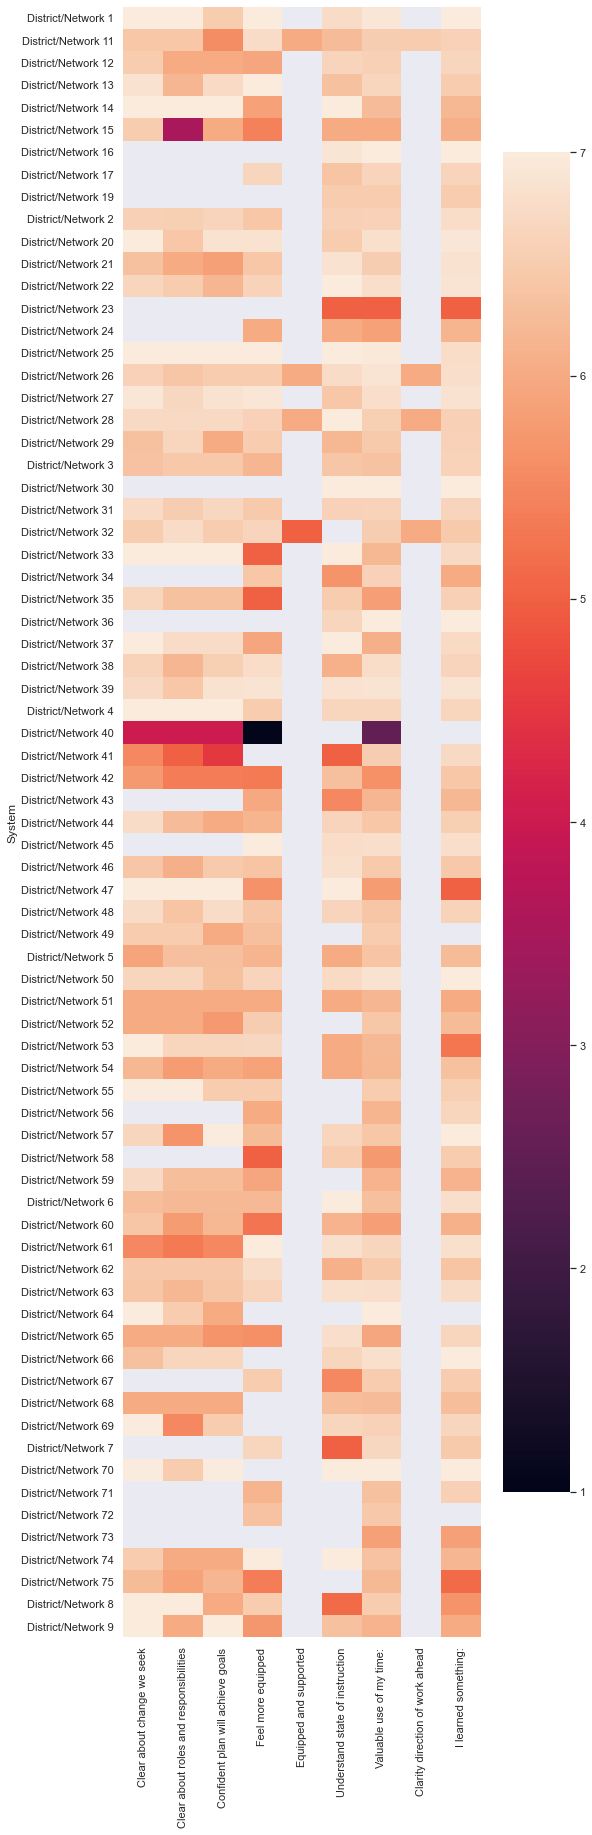

In [27]:
plt.figure(figsize=(8, 30))
sns.heatmap(system_mean.drop('Likely to recommend Instruction Partners', axis=1))
plt.show()

The following school systems have relatively lower average scores on 1 or more survey questions:
- District/Network 15
- District/Network 23
- District/Network 40
- District/Network 41

In [28]:
# District/Network 15
survey_num[survey_num['System']=='District/Network 15'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,2.0,6.500000,0.707107,6.0,6.25,6.5,6.75,7.0
Clear about roles and responsibilities,2.0,3.500000,2.121320,2.0,2.75,3.5,4.25,5.0
Confident plan will achieve goals,2.0,6.000000,1.414214,5.0,5.50,6.0,6.50,7.0
Feel more equipped,19.0,5.421053,1.538968,1.0,5.00,5.0,7.00,7.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0
Valuable use of my time:,73.0,6.000000,1.394433,1.0,6.00,6.0,7.00,7.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,71.0,6.084507,1.239199,1.0,6.00,6.0,7.00,7.0
Likely to recommend Instruction Partners,65.0,7.738462,2.306763,1.0,6.00,8.0,10.00,10.0


Low average scores on:
- "Clear about roles and responsibilities" (very low)
- "Feel more equipped"

In [29]:
# District/Network 23
survey_num[survey_num['System']=='District/Network 23'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clear about roles and responsibilities,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confident plan will achieve goals,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feel more equipped,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,3.0,5.000000,3.464102,1.0,4.0,7.0,7.0,7.0
Valuable use of my time:,3.0,5.000000,3.464102,1.0,4.0,7.0,7.0,7.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,3.0,5.000000,3.464102,1.0,4.0,7.0,7.0,7.0
Likely to recommend Instruction Partners,3.0,9.666667,0.577350,9.0,9.5,10.0,10.0,10.0


Only 3 respondents here.

In [30]:
# District/Network 40
survey_num[survey_num['System']=='District/Network 40'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,1.0,4.0,NaN,4.0,4.00,4.0,4.00,4.0
Clear about roles and responsibilities,1.0,4.0,NaN,4.0,4.00,4.0,4.00,4.0
Confident plan will achieve goals,1.0,4.0,NaN,4.0,4.00,4.0,4.00,4.0
Feel more equipped,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valuable use of my time:,2.0,2.5,2.12132,1.0,1.75,2.5,3.25,4.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Likely to recommend Instruction Partners,1.0,2.0,NaN,2.0,2.00,2.0,2.00,2.0


We analyzed this earlier:

Very few respondents from District/Network 40.  Seems like they are not very pleased with Instruction Partners.

In [31]:
# District/Network 41
survey_num[survey_num['System']=='District/Network 41'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clear about change we seek,2.0,5.500000,0.707107,5.0,5.25,5.5,5.75,6.0
Clear about roles and responsibilities,2.0,5.000000,1.414214,4.0,4.50,5.0,5.50,6.0
Confident plan will achieve goals,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0
Feel more equipped,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equipped and supported,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Understand state of instruction,3.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
Valuable use of my time:,19.0,6.526316,0.611775,5.0,6.00,7.0,7.00,7.0
Clarity direction of work ahead,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I learned something:,17.0,6.705882,0.469668,6.0,6.00,7.0,7.00,7.0
Likely to recommend Instruction Partners,17.0,8.411765,1.543487,4.0,8.00,8.0,10.00,10.0


Low scores for:
- 'Clear about change we seek' (2 respondents)
- 'Clear about roles and responsibilities' (2 respondents)
- 'Confident plan will achieve goals' (2 respondents)
- 'Understand state of instruction' (3 respondents)

### Part 3: Analyze Delivery Method

Looking at how respondents feel about in-person vs virtual events.

In [32]:
# how many of of each do we have?
survey_num['Delivery Method'].value_counts()

Virtual    2241
On-site    1304
Name: Delivery Method, dtype: int64

Almost twice as many respondents from virtual-events compared to on-site events.

In [33]:
delivery_mean = pd.DataFrame(survey_num.groupby('Delivery Method').mean())
delivery_mean = delivery_mean.transpose().reset_index()
delivery_mean

Delivery Method,index,On-site,Virtual
0,Clear about change we seek,6.641791,6.487324
1,Clear about roles and responsibilities,6.447761,6.245070
2,Confident plan will achieve goals,6.626866,6.363380
3,Feel more equipped,6.337386,6.168421
4,Equipped and supported,NaN,5.750000
5,Understand state of instruction,6.459413,6.296296
6,Valuable use of my time:,6.550613,6.346720
7,Clarity direction of work ahead,NaN,6.125000
8,I learned something:,6.610147,6.423510
9,Likely to recommend Instruction Partners,8.806122,8.597622


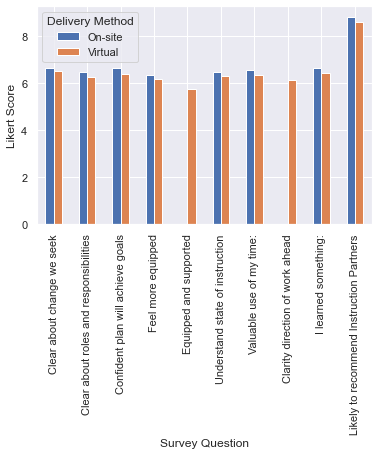

In [34]:
delivery_mean.plot(x="index", y=["On-site", "Virtual"], kind="bar")
plt.xlabel('Survey Question')
plt.ylabel('Likert Score')
plt.show()

Average responses are quite similar for both on-site events and virtual events, which is a huge strength.  Virtual events are <i>slightly</i> lower, but not by much.

### Part 4: Analyze Instruction Partners Team

In [35]:
len(survey_num['Team'].unique())

10

In [36]:
team_mean = pd.DataFrame(survey_num.groupby('Team').mean())
team_mean

,Clear about change we seek,Clear about roles and responsibilities,Confident plan will achieve goals,Feel more equipped,Equipped and supported,Understand state of instruction,Valuable use of my time:,Clarity direction of work ahead,I learned something:,Likely to recommend Instruction Partners
Team,,,,,,,,,,
Team 1,6.702703,6.364865,6.432432,6.314488,6.0,6.410072,6.495868,6.166667,6.507937,8.817073
Team 2,6.227273,6.227273,6.090909,6.023333,5.0,6.071429,6.250489,6.000000,6.358621,8.331307
Team 3,6.458333,6.180556,6.305556,6.013072,NaN,6.625000,6.271579,NaN,6.525641,8.191781
Team 4,6.542169,6.391566,6.554217,6.402340,NaN,6.470790,6.546548,NaN,6.656522,8.925154
Team 5,6.000000,6.000000,6.000000,5.725000,NaN,6.636364,6.370370,NaN,6.527273,8.197368
Team 6,NaN,NaN,NaN,5.590909,NaN,NaN,5.727273,NaN,NaN,8.727273
Team 7,6.428571,5.857143,6.071429,NaN,NaN,6.291667,6.684211,NaN,6.541667,9.083333
Team 8,4.000000,4.000000,4.000000,1.000000,NaN,NaN,2.500000,NaN,NaN,2.000000
Team 9,6.666667,6.277778,6.500000,5.901042,NaN,6.684211,6.164286,NaN,6.517647,8.538153


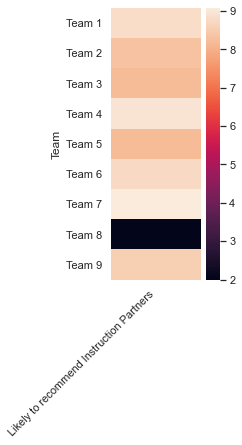

In [37]:
plt.figure(figsize=(2,5))
sns.heatmap(team_mean[['Likely to recommend Instruction Partners']])
plt.xticks(rotation=45, ha='right')
plt.show()

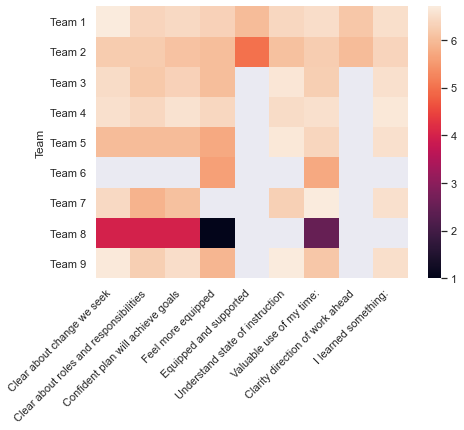

In [38]:
plt.figure(figsize=(7,5))
sns.heatmap(team_mean.drop('Likely to recommend Instruction Partners', axis=1))
plt.xticks(rotation=45, ha='right')
plt.show()

Looks like Team 8 does not has low scores.  Let's explore the dataset of Team 8.

In [39]:
survey_num[survey_num['Team']=='Team 8'].transpose()

,311,312
Survey Collection ID,a152E00000F1oIKQAZ,a152E00000F1oIKQAZ
System,District/Network 40,District/Network 40
School,School 103,School 103
Survey Type,Professional Development,Professional Development
Delivery Method,Virtual,Virtual
Date,2021-09-01 00:00:00,2021-09-01 00:00:00
Primary Facilitator,Facilitator 47,Facilitator 47
Secondary Facilitator,NaN,NaN
Tertiary Facilitator,NaN,NaN
Quaternary Facilitator,NaN,NaN


Scores are very low, but sparse and only two respondents.

## 5. What are the significant patterns or trends? How is the data changing over time?

In [40]:
# Check date range of dataset
print('First survey date:',survey_num.Date.min())
print('Last survey date:',survey_num.Date.max())

First survey date: 2021-07-13 00:00:00
Last survey date: 2022-02-28 00:00:00


In [41]:
survey_roll = survey_num.groupby('Date').mean()
#survey_roll = survey_num.rolling(5, min_periods=1, on = 'Date').mean()
survey_roll.head()

,Clear about change we seek,Clear about roles and responsibilities,Confident plan will achieve goals,Feel more equipped,Equipped and supported,Understand state of instruction,Valuable use of my time:,Clarity direction of work ahead,I learned something:,Likely to recommend Instruction Partners
Date,,,,,,,,,,
2021-07-13,NaN,NaN,NaN,NaN,NaN,NaN,6.181818,NaN,6.363636,NaN
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,NaN,6.285714,NaN
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,6.600000,NaN,6.266667,9.714286
2021-07-22,NaN,NaN,NaN,NaN,NaN,NaN,6.800000,NaN,6.800000,9.500000
2021-07-26,NaN,NaN,NaN,NaN,NaN,NaN,6.636364,NaN,6.545455,9.000000


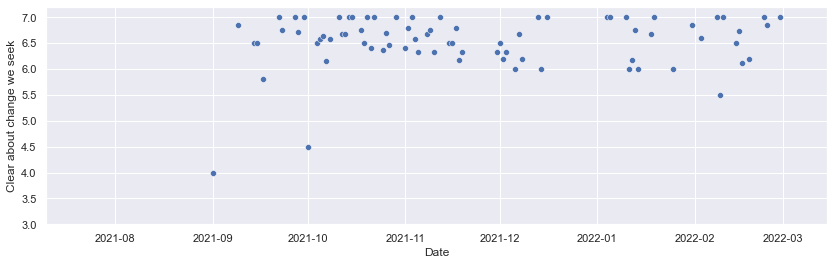

In [42]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='Clear about change we seek',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

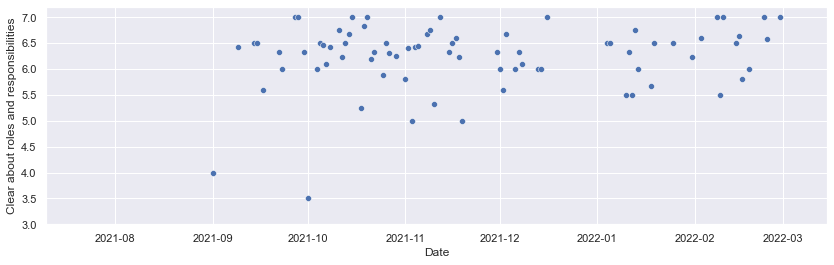

In [43]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='Clear about roles and responsibilities',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

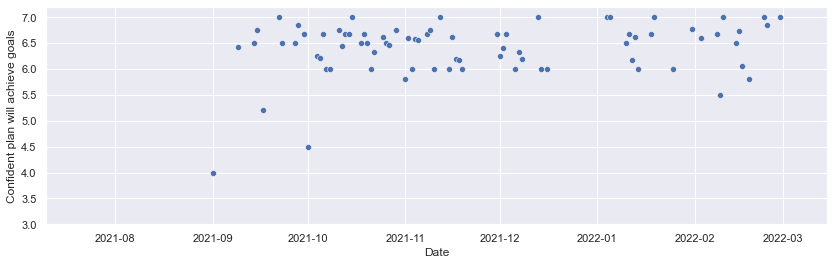

In [44]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='Confident plan will achieve goals',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

These three time series above seem to have low scores in the first month and then it stays consistent between 6 and 7. It may be likely that the two low points at the beginning of September and beginning of October for all of these graphs are from the same event.

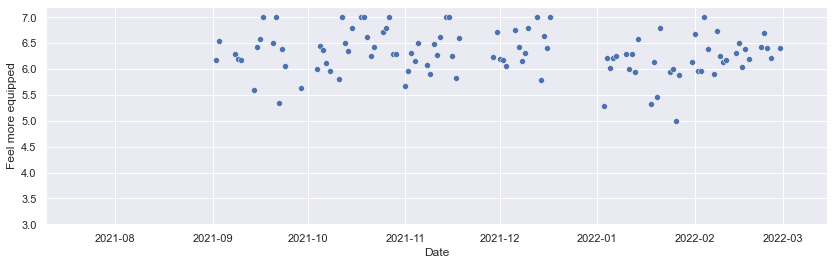

In [45]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='Feel more equipped',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

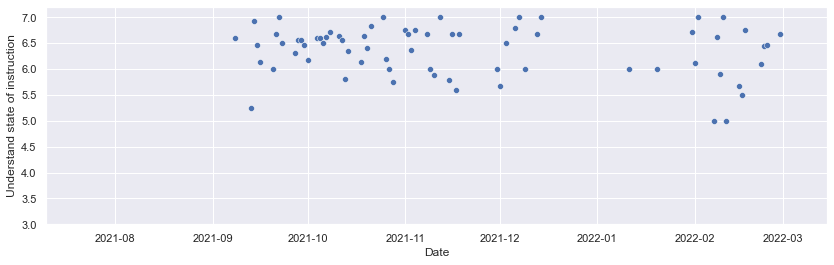

In [46]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='Understand state of instruction',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

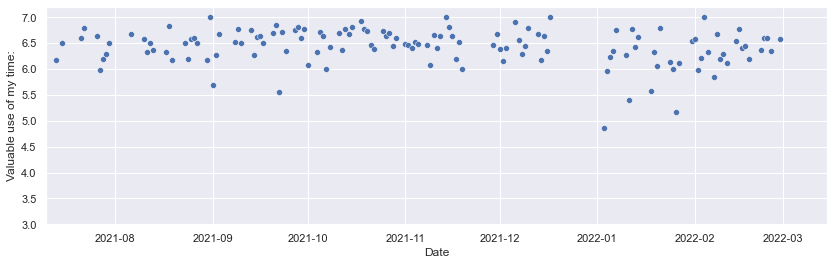

In [47]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='Valuable use of my time:',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

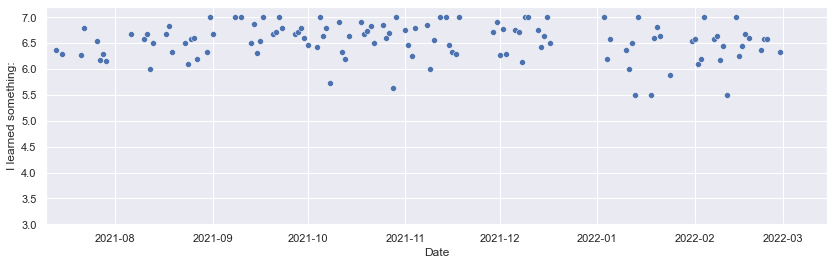

In [48]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Date', 
            y='I learned something:',
                data=survey_roll
           )
plt.ylim([3, 7.2])
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

These time series above are generally consistent between 5.5 and 7, but they do seem to be slightly trending downward towards the end of the time period of the dataset, especially in btween January and February.

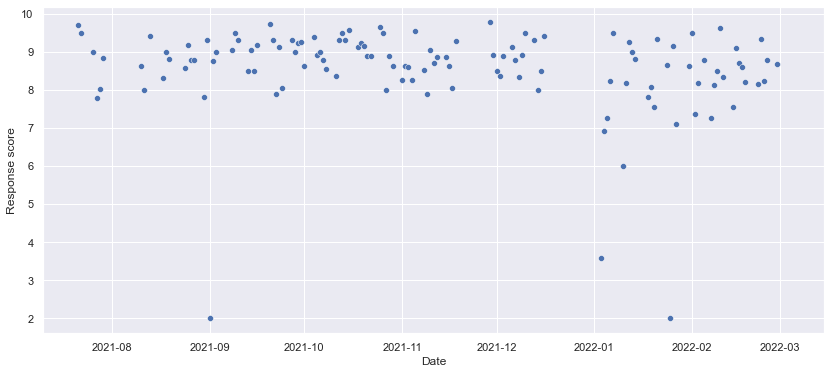

In [49]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Date', 
            y='Likely to recommend Instruction Partners',
                data=survey_roll
           )
plt.ylabel('Response score')
plt.xlim(pd.Timestamp('2021-07-10'), pd.Timestamp('2022-03-15'))
plt.show()

We see a similar dip in response scores in between January and February. 